### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme()

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.shape

(12684, 26)

In [5]:
data.isna().sum()
#car column has all the missing values...

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data["car"] = data["car"].fillna("Unknown")

In [7]:
df_clean = data.dropna()

In [8]:
#change some of the categorical columns to numeric so we can get a heatmap
df_clean['n_age']=df_clean['age'].str.replace('50plus', '51');
df_clean['n_age']=df_clean['n_age'].str.replace('below21', '16');
df_clean = df_clean.astype({'n_age': 'int32'});

#get lower bound for income...
df_clean['n_income'] = df_clean['income'].str.replace('Less than $12500', '0')
df_clean['n_income'] = df_clean['n_income'].str.replace('$100000 or More', '100000')
df_clean['n_income'] = df_clean['n_income'].str.replace('\$([^\s]*) \- .*', '\\1', regex=True);
df_clean = df_clean.astype({'n_income': 'float64'});

#change temperature
df_clean = df_clean.astype({'temperature': 'int32'});

#change time
df_clean['n_time'] = pd.to_datetime(df_clean['time'], format='%I%p').dt.hour

#lower bound for carryaway, coffehouse, restaurants<20, and restaurants20-50 coupons
changeList = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for s in changeList:
    new_column = 'n_' + s
    df_clean[new_column] = df_clean[s].str.replace('never','0')
    df_clean[new_column] = df_clean[new_column].str.replace('less1','0.5')
    df_clean[new_column] = df_clean[new_column].str.replace('1~3','1')
    df_clean[new_column] = df_clean[new_column].str.replace('4~8','4')
    df_clean[new_column] = df_clean[new_column].str.replace('gt8','9')
    df_clean = df_clean.astype({new_column: 'float32'});
    
#make a data column of distance: 5, 15, 25, opposites: -5, -15, -25
df_clean['n_distance'] = 25 * df_clean['toCoupon_GEQ25min'];
df_clean['n_distance'] = df_clean['n_distance'] + (df_clean['toCoupon_GEQ25min']-1) *  15 * df_clean['toCoupon_GEQ15min'];
df_clean['n_distance'] = df_clean['n_distance'] + (df_clean['toCoupon_GEQ15min']-1) *  5 * df_clean['toCoupon_GEQ5min'];
df_clean['n_distance'] = df_clean['n_distance'] * ( -1 * df_clean['direction_opp'] + df_clean['direction_same']);

#change expiration date to hours
df_clean['n_expiration'] = df_clean['expiration'].str.replace('1d', '24');
df_clean['n_expiration'] = df_clean['n_expiration'].str.replace('2h', '2');
df_clean = df_clean.astype({'n_expiration': 'int32'});



C:\Users\Slytherin\AppData\Local\Temp\ipykernel_29880\455803786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['n_age']=df_clean['age'].str.replace('50plus', '51');
C:\Users\Slytherin\AppData\Local\Temp\ipykernel_29880\455803786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['n_age']=df_clean['n_age'].str.replace('below21', '16');


4. What proportion of the total observations chose to accept the coupon? 



In [9]:
#ratio of coupon acceptance:
prop = df_clean.groupby("Y")[["Y"]].count() / len(df_clean)
prop

,Y
Y,
0,0.430665
1,0.569335


In [10]:
prop.iloc[1]/prop.iloc[0]

Y    1.321992
dtype: float64

5. Use a bar plot to visualize the `coupon` column.

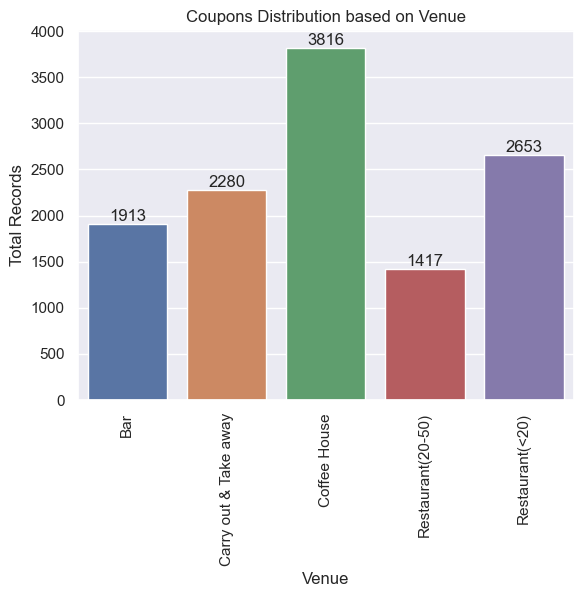

In [11]:
df_coupon= df_clean.groupby(['coupon'])[['Y']].count()
df_coupon=df_coupon.rename(columns = {'Y':'Count'})

fig, ax = plt.subplots()

ax = sns.barplot(df_coupon.reset_index(), x='coupon',  y='Count')
ax.bar_label(ax.containers[0])
ax.set( title='Coupons Distribution based on Venue')
plt.xlabel('Venue')
plt.ylabel("Total Records");
plt.xticks(rotation = 90);

6. Use a histogram to visualize the temperature column.

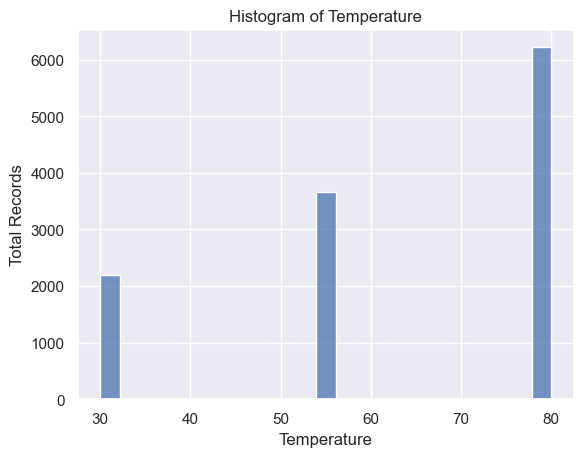

In [12]:
ax = sns.histplot(data=df_clean, x="temperature")
ax.set( title='Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel("Total Records");

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
df_bar = df_clean.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [14]:
df_bar.groupby("Y")[["Y"]].sum().iloc[1] / len(df_bar)

Y    0.411918
Name: 1, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
df_3less = df_bar.query('n_Bar <= 3')
rate_3less = df_3less.groupby("Y")[["Y"]].sum().iloc[1] / len(df_3less)

df_4more = df_bar.query('n_Bar > 3')
rate_4more = df_4more.groupby("Y")[["Y"]].sum().iloc[1] / len(df_4more)

rate = rate_3less / rate_4more
rate

Y    0.489294
Name: 1, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
df_q41 = df_bar.query('(n_Bar > 1)and(n_age > 25)')
df_q41 = df_q41.groupby("Y")[["Y"]].sum().iloc[1] / len(df_q41)

df_q42 = df_bar.query('(n_Bar <= 1)or(n_age <= 25)')
df_q42 = df_q42.groupby("Y")[["Y"]].sum().iloc[1] / len(df_q42)

rate = df_q41 / df_q42
rate


Y    1.98996
Name: 1, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [17]:
df_q51 = df_bar.query('(n_Bar > 1)and(passanger != "Kid(s)")and(occupation != "Farming Fishing & Forestry")')
df_q51 = df_q51.groupby("Y")[["Y"]].sum().iloc[1] / len(df_q51)

df_q52 = df_bar.query('(n_Bar <= 1)or(passanger == "Kid(s)")or(occupation == "Farming Fishing & Forestry")')
df_q52 = df_q52.groupby("Y")[["Y"]].sum().iloc[1] / len(df_q52)

rate = df_q51 / df_q52
rate

Y    2.053184
Name: 1, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
df_q61a = df_bar.query('(n_Bar > 1)and(passanger != "Kid(s)")and(maritalStatus != "Widowed")')
df_q61b = df_bar.query('(n_Bar > 1)and(n_age < 30)')
df_q61c = df_bar.query('(n_RestaurantLessThan20 > 4)and(n_income < 50000)')
df_q61 = pd.merge(left = df_q61a, right=df_q61b, how='outer')
df_q61 = pd.merge(left = df_q61, right=df_q61c, how='outer')
df_q61 = df_q61.groupby("Y")[["Y"]].sum().iloc[1] / len(df_q61)


df_q62a = df_bar.query('(n_Bar <= 1)or(passanger == "Kid(s)")or(maritalStatus == "Widowed")')
df_q62b = df_bar.query('(n_Bar <= 1)or(n_age >= 30)')
df_q62c = df_bar.query('(n_RestaurantLessThan20 <= 4)or(n_income >= 50000)')
df_q62 = pd.merge(left = df_q62a, right=df_q62b, how='inner')
df_q62 = pd.merge(left = df_q62, right=df_q62c, how='inner')
df_q62 = df_q62.groupby("Y")[["Y"]].sum().iloc[1] / len(df_q62)

rate = df_q61 / df_q62
rate

Y    1.918222
Name: 1, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### The chances that drivers accept the coupon increases by almost a factor of 2, if:
    1- They go to bars more than 3 times.
    2- They are over 25.
    3- They have no kids in the car.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Ultimate Pie Chart
Create a single Pie Chart that shows distributions of all coupons, percentage of acceptance within each coupon, and all acceptance.

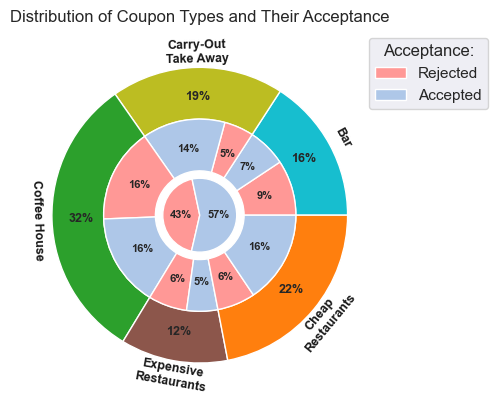

In [19]:
#Create the Ultimate Pie Chart about Coupon Distribution

df_coupon_level1 = df_clean.groupby(['coupon'])[['Y']].count()
df_coupon_level1=df_coupon_level1.rename(columns = {'Y':'Count'})

df_coupon_level2 = df_clean.groupby(['coupon', 'Y'])[['Y']].count()
df_coupon_level2=df_coupon_level2.rename(columns = {'Y':'Count'})


outer_labels = ['Bar', 'Carry-Out\nTake Away', 'Coffee House', 'Expensive\nRestaurants', 'Cheap\nRestaurants']
cmap = plt.colormaps["tab20"]
outer_colors = cmap([18, 16, 4, 10, 2])
inner_colors = cmap([7,1])
size = 0.35

fig, ax = plt.subplots()

outer_pie=ax.pie(df_coupon_level1.to_numpy().sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=outer_labels, autopct='%1.0f%%',
       pctdistance=.8, labeldistance=1.1, rotatelabels =True)

plt.setp(outer_pie[1], rotation_mode="anchor", ha="center", va="center")
plt.setp(outer_pie[2], size=9, weight="bold")
for tx in outer_pie[1]:
    rot = tx.get_rotation()
    tx.set_rotation(rot+90+(1-rot//180)*180)
    tx.set_fontsize(9)
    tx.set_color('k')
    tx.set_weight('bold')


inner_labels = ['Accepted','Rejected','Accepted','Rejected','Accepted','Rejected','Accepted','Rejected','Accepted','Rejected']
wedges, texts, autotexts = ax.pie(df_coupon_level2.to_numpy().flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.f%%', pctdistance=.7)
ax.set(aspect="equal", title='Distribution of Coupon Types and Their Acceptance')
plt.setp(autotexts, size=8, weight="bold")
ax.legend(wedges, ['Rejected', 'Accepted'], loc='upper right', title='Acceptance:', bbox_to_anchor=(1, 0, 0.3, 1))

#most inner pie...
df_coupon_level3 = df_clean.groupby(['Y'])[['Y']].count()
wedges, texts, autotexts = ax.pie(df_coupon_level3.to_numpy().flatten(), radius=0.95-size-0.35, colors=inner_colors,
       wedgeprops=dict(width=size-.1, edgecolor='w'), autopct='%1.f%%', pctdistance=.5, startangle=102)
plt.setp(autotexts, size=8, weight="bold")

plt.show()
fig.savefig("images/coupons_distribution.png")

# Age Distribution

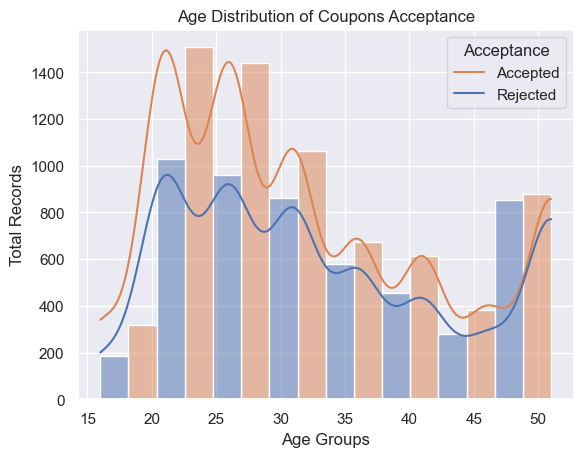

In [20]:
ax = sns.histplot(data=df_clean, x='n_age', hue='Y', kde=True, multiple='dodge', bins=8)
ax.set( title='Age Distribution of Coupons Acceptance')
sns.move_legend(ax, "upper right", bbox_to_anchor=(1, 1))
plt.legend(title='Acceptance', labels=['Accepted','Rejected'])
plt.xlabel('Age Groups')
plt.ylabel("Total Records");
plt.savefig('images/age_distribution.png')

# Driving Distance and Passanger Stataus

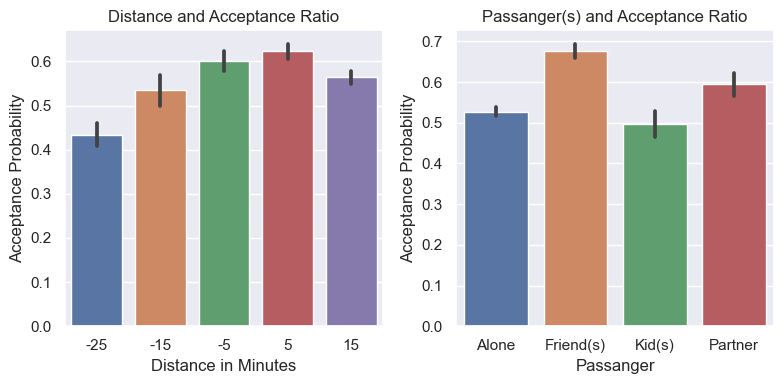

In [21]:
fig, ax = plt.subplots(1,2, figsize=(8, 4));

ax1 = sns.barplot(data=df_clean, x='n_distance', y='Y', ax=ax[0]);
ax1.set_xlabel('Distance in Minutes');
ax1.set_ylabel("Acceptance Probability");
ax1.set_title('Distance and Acceptance Ratio');

ax2 = sns.barplot(data=df_clean, x='passanger', y='Y', ax=ax[1]);
ax2.set_xlabel('Passanger');
ax2.set_ylabel("Acceptance Probability");
ax2.set_title('Passanger(s) and Acceptance Ratio');

fig.tight_layout();
plt.savefig('images/distance_and_company.png')

# Time of Day and Expiration

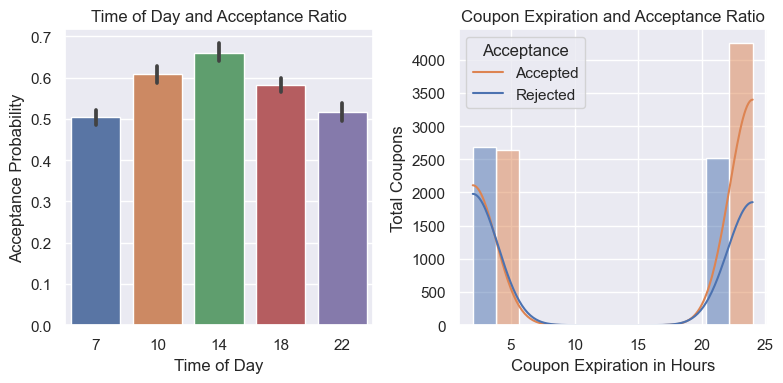

In [22]:
fig, ax = plt.subplots(1,2, figsize=(8, 4));

ax1 = sns.barplot(data=df_clean, x='n_time', y='Y', ax=ax[0]);
ax1.set_xlabel('Time of Day');
ax1.set_ylabel("Acceptance Probability");
ax1.set_title('Time of Day and Acceptance Ratio');

ax2 = sns.histplot(data=df_clean, x='n_expiration', hue='Y', ax=ax[1], multiple='dodge', bins=6, kde=True);
ax2.set_xlabel('Coupon Expiration in Hours');
ax2.set_ylabel("Total Coupons");
ax2.legend(title='Acceptance', labels=['Accepted','Rejected'])
ax2.set_title('Coupon Expiration and Acceptance Ratio');

fig.tight_layout();
plt.savefig('images/time_and_expiration.png')

# Exploring Other Coupon Types

## Coffee House

In [23]:
#explore coffee house coupons
df_coffee = df_clean.query('coupon == "Coffee House"')

#what is the probabilty of acceptance?
df_coffee.groupby('Y')[['Y']].sum().iloc[1] / len(df_coffee)

Y    0.496331
Name: 1, dtype: float64

In [24]:
# try limiting the age range
df_20to30 = df_coffee.query('(n_age>20)and(n_age<30)')
df_20to30.groupby('Y')[['Y']].sum().iloc[1] / len(df_20to30)

Y    0.515539
Name: 1, dtype: float64

In [25]:
# try limiting the age range and passanger
df_20to30notalone = df_coffee.query('(n_age>20)and(n_age<30)and(passanger != "Alone")')
df_20to30notalone.groupby('Y')[['Y']].sum().iloc[1] / len(df_20to30notalone)

Y    0.613128
Name: 1, dtype: float64

In [26]:
# try limiting the age range and passanger and distance
df_20to30notaloneCloseBy = df_coffee.query('(n_age>20)and(n_age<30)and(passanger != "Alone")and(abs(n_distance)<=5)')
df_20to30notaloneCloseBy.groupby('Y')[['Y']].sum().iloc[1] / len(df_20to30notaloneCloseBy)

Y    0.623116
Name: 1, dtype: float64

In [27]:
# try limiting the age range and passanger and distance and income range
df_20to30notaloneCloseByIncome = df_coffee.query('(n_age>20)and(n_age<30)and(passanger != "Alone")')
df_20to30notaloneCloseByIncome = df_20to30notaloneCloseByIncome.query('(abs(n_distance)<=5)and(n_income<50000)and(n_income>25000)')
df_20to30notaloneCloseByIncome.groupby('Y')[['Y']].sum().iloc[1] / len(df_20to30notaloneCloseByIncome)

Y    0.706897
Name: 1, dtype: float64

In [28]:
# try limiting the age range and passanger and distance and income range and time of day and expiration
df_coffeeLimits = df_coffee.query('(n_age>20)and(n_age<30)and(passanger != "Alone")')
df_coffeeLimits = df_coffeeLimits.query('(abs(n_distance)<=5)and(n_income<50000)and(n_income>25000)')
df_coffeeLimits = df_coffeeLimits.query('(n_time in [10,18])and(n_expiration>2)')
df_coffeeLimits.groupby('Y')[['Y']].sum().iloc[1] / len(df_coffeeLimits)

Y    0.866667
Name: 1, dtype: float64

## Carry-Out and Take-Away

In [29]:
df_carryaway = df_clean.query('coupon == "Carry out & Take away"')

df_carryaway.groupby('Y')[['Y']].sum().iloc[1] / len(df_carryaway)

Y    0.737719
Name: 1, dtype: float64

In [30]:
# try limiting the passanger
df_friends = df_carryaway.query('(passanger == "Friend(s)")')
df_friends.groupby('Y')[['Y']].sum().iloc[1] / len(df_friends)

Y    0.759547
Name: 1, dtype: float64

In [31]:
# try limiting passanger and time of day
df_friends6PM = df_carryaway.query('(passanger == "Friend(s)")and(n_time == 18)')
df_friends6PM.groupby('Y')[['Y']].sum().iloc[1] / len(df_friends6PM)

Y    0.913043
Name: 1, dtype: float64

In [32]:
# try limiting passanger and time of day and income
df_friends6PMincome = df_carryaway.query('(passanger == "Friend(s)")and(n_time == 18)and(n_income >= 25000)')
df_friends6PMincome.groupby('Y')[['Y']].sum().iloc[1] / len(df_friends6PMincome)

Y    0.941176
Name: 1, dtype: float64

## Cheap Restaurants

In [33]:
df_cheap = df_clean.query('coupon == "Restaurant(<20)"')

df_cheap.groupby('Y')[['Y']].sum().iloc[1] / len(df_cheap)

Y    0.709009
Name: 1, dtype: float64

In [34]:
# try limiting the expiration
df_cheapExp = df_cheap.query('(n_expiration>2)')
df_cheapExp.groupby('Y')[['Y']].sum().iloc[1] / len(df_cheapExp)

Y    0.835913
Name: 1, dtype: float64

In [35]:
# try limiting the expiration and passanger
df_cheapExpPass = df_cheap.query('(n_expiration>2)and(passanger =="Friend(s)")')
df_cheapExpPass.groupby('Y')[['Y']].sum().iloc[1] / len(df_cheapExpPass)

Y    0.917241
Name: 1, dtype: float64

In [36]:
# try limiting expiration and passanger and time of day
df_cheapExpPass6PM = df_cheap.query('(n_expiration>2)and(passanger == "Friend(s)")and(n_time == 18)')
df_cheapExpPass6PM.groupby('Y')[['Y']].sum().iloc[1] / len(df_cheapExpPass6PM)

Y    0.929204
Name: 1, dtype: float64

In [37]:
# try limiting expiration and passanger and time of day and income
df_cheapExpPass6PMincome = df_cheap.query('(n_expiration>2)and(passanger == "Friend(s)")and(n_time == 18)and(n_income>25000)and(n_income<=50000)')
df_cheapExpPass6PMincome.groupby('Y')[['Y']].sum().iloc[1] / len(df_cheapExpPass6PMincome)

Y    0.972222
Name: 1, dtype: float64

## Expensive Restaurants

In [38]:
df_expensive = df_clean.query('coupon == "Restaurant(20-50)"')

df_expensive.groupby('Y')[['Y']].sum().iloc[1] / len(df_expensive)

Y    0.446013
Name: 1, dtype: float64

In [39]:
# try limiting the expiration
df_expensiveExp = df_expensive.query('(n_expiration>2)')
df_expensiveExp.groupby('Y')[['Y']].sum().iloc[1] / len(df_expensiveExp)

Y    0.523652
Name: 1, dtype: float64

In [40]:
# try limiting the expiration and passanger
df_expensiveExpPass = df_expensive.query('(n_expiration>2)and(passanger == "Partner")')
df_expensiveExpPass.groupby('Y')[['Y']].sum().iloc[1] / len(df_expensiveExpPass)

Y    0.711111
Name: 1, dtype: float64

In [41]:
# try limiting the expiration and passanger and income
df_expensiveExpPassIncome = df_expensive.query('(n_expiration>2)and(passanger == "Partner")and(n_income>=80000)')
df_expensiveExpPassIncome.groupby('Y')[['Y']].sum().iloc[1] / len(df_expensiveExpPassIncome)

Y    0.761905
Name: 1, dtype: float64

In [42]:
# try limiting the expiration and passanger and income and temperature
df_expensiveExpPassIncomeTime = df_expensive.query('(n_expiration>2)and(passanger == "Partner")and(n_income>=80000)and(temperature>50)')
df_expensiveExpPassIncomeTime.groupby('Y')[['Y']].sum().iloc[1] / len(df_expensiveExpPassIncomeTime)

Y    0.8
Name: 1, dtype: float64